In this notebook, we will visualize the publishing frequency of dpa articles before and after pre-processing, highlighting the impact of the pre-processing steps on the dataset.

In [1]:
import os
import pandas as pd
from ast import literal_eval

# Set the path variable to point to the 'newspaper_data_processing' directory, which is located in the same 
# parent directory as 'newspaper_analysis'. This is the repository used for data pre-processing.
path = os.getcwd().replace('\\newspaper_analysis\\data', '') + '\\newspaper_data_processing'

# Load pre-processed 'dpa' dataset from a CSV file.
dpa = pd.read_csv(path + '\\dpa\\' + 'dpa_prepro_final.csv', encoding = 'utf-8', sep=';', index_col = 0,  keep_default_na=False,
                   dtype = {'rubrics': 'str', 
                            'source': 'str',
                            'keywords': 'str',
                            'title': 'str',
                            'city': 'str',
                            'genre': 'str',
                            'wordcount': 'str'},
                  converters = {'paragraphs': literal_eval})

# Load the raw 'dpa' dataset from a CSV file.
dpa_raw = pd.read_csv(path + '\\dpa\\' + 'dpa_raw.csv', encoding = 'utf-8', index_col = 0,  keep_default_na=False,
                   dtype = {'rubrics': 'str', 
                            'source': 'str',
                            'keywords': 'str',
                            'title': 'str',
                            'city': 'str',
                            'genre': 'str',
                            'wordcount': 'str'},
                  converters = {'paragraphs': literal_eval})

In [2]:
# Create a 'date' column in the 'dpa_raw' DataFrame
dpa_raw['date'] = pd.to_datetime(dpa_raw[['year', 'month', 'day']])
# Convert 'date' column to datetime
dpa['date'] = pd.to_datetime(dpa['date'])
dpa_raw['date'] = pd.to_datetime(dpa_raw['date'])
# Split 'dpa_raw' into 'dpa_raw_wipo' (dpa-Basisdienst) and 'dpa_raw_afx' (dpa-afx)
dpa_raw_wipo = dpa_raw[dpa_raw.topic == 'WiPo']
dpa_raw_afx = dpa_raw[dpa_raw.topic == 'afx']

In [3]:
# Aggregate data by date to count articles published each day
daily_count_dpa = dpa.groupby(dpa['date'].dt.date).size()

# Calculate the 30-day moving average
ma_dpa = daily_count_dpa.rolling(window=30).mean()

# Repeat the same for 'dpa_raw'
daily_count_dpa_raw = dpa_raw.groupby(dpa_raw['date'].dt.date).size()
ma_dpa_raw = daily_count_dpa_raw.rolling(window=30).mean()

# Repeat the same for 'dpa_raw_wipo'
daily_count_dpa_raw_wipo = dpa_raw_wipo.groupby(dpa_raw_wipo['date'].dt.date).size()
ma_dpa_raw_wipo = daily_count_dpa_raw_wipo.rolling(window=30).mean()

# Repeat the same for 'dpa_raw_afx'
daily_count_dpa_raw_afx = dpa_raw_afx.groupby(dpa_raw_afx['date'].dt.date).size()
ma_dpa_raw_afx = daily_count_dpa_raw_afx.rolling(window=30).mean()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


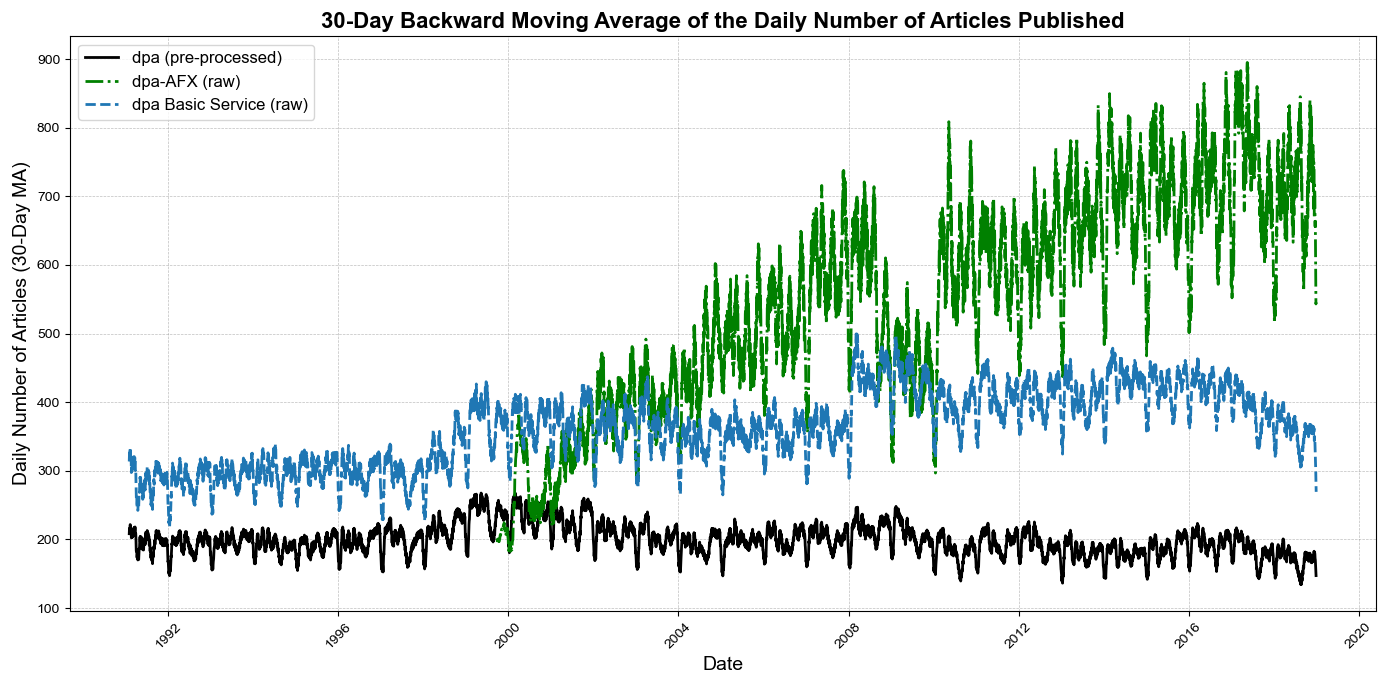

In [4]:
import matplotlib.pyplot as plt

# Set the figure size for better visibility
plt.figure(figsize=(14, 7))

# Plot the 30-day moving average for dpa, dpa_raw_afx, and dpa_raw_wipo
plt.plot(ma_dpa.index, ma_dpa, label='dpa (pre-processed)', linewidth=2, color='black')
plt.plot(ma_dpa_raw_afx.index, ma_dpa_raw_afx, label='dpa-AFX (raw)', linewidth=2, linestyle='dashdot', color='green')
plt.plot(ma_dpa_raw_wipo.index, ma_dpa_raw_wipo, label='dpa Basic Service (raw)', linewidth=2, linestyle='dashed')

# Enhance the plot with a title, axis labels, and legend
plt.title('30-Day Backward Moving Average of the Daily Number of Articles Published', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Number of Articles (30-Day MA)', fontsize=14)
plt.legend(fontsize=12, loc='upper left')

# Improve readability of the x-axis labels
plt.xticks(rotation=45)

# Set grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

# Tighten the layout to make full use of space
plt.tight_layout()

# Apply a sophisticated look with a predefined style
plt.style.use('seaborn-darkgrid')

# Save the plot
plt.savefig('dpa_daily_publications.eps', format='eps')
plt.savefig('dpa_daily_publications.png', format='png')

# Show the plot
plt.show()